# Future Sales Prediction with Machine Learning

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:

figure = px.scatter(data_frame = df, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [15]:
figure = px.scatter(
    data_frame=df, x="Sales", y="Newspaper", size="Newspaper", trendline="ols"
)
figure.show()

In [18]:
figure = px.scatter(data_frame=df, x="Sales", y="Radio", size="Radio", trendline="ols")
figure.show()

In [20]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


c:\New folder\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



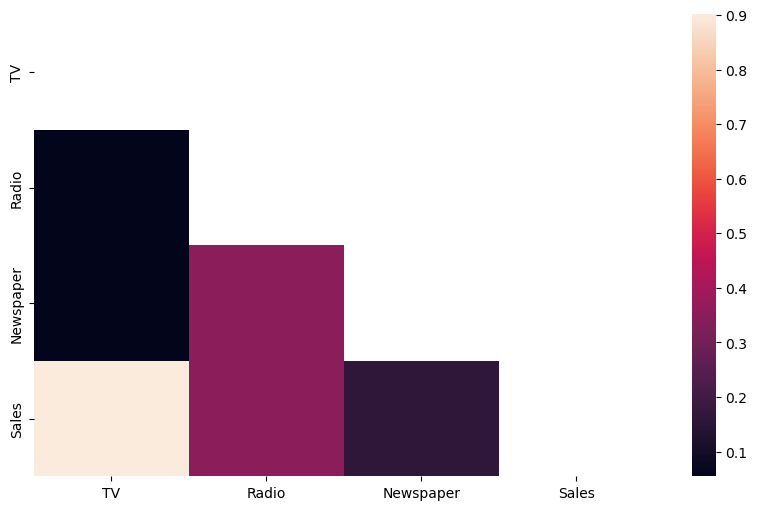

In [17]:
plt.figure(figsize=(10, 6))


mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

In [8]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


## Future Sales Prediction Model

In [9]:
x = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

C:\Users\Emad\AppData\Local\Temp\ipykernel_8244\2488982787.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [10]:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9059011844150826


In [11]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]
